In [28]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from nsimpkg.random_variables import NormalRV, MixNormalRV
from nsimpkg.gaussian_OAIS import SG_OAIS
from nsimpkg.mcsim import mcsim, rho
from nsimpkg.plotting import plot_contours, plotter, fill_z
np.random.seed(0)


plt.rcParams['figure.dpi'] = 300
m1 = np.array([3, 0])
m2 = np.array([-3, 0])
Sigma1 = np.array([[1, 0], [0, 1]])
Sigma2 = np.array([[1, 0], [0, 1]])

q = NormalRV(np.array([10, -10]), np.array([[40, 0], [0, 40]]))
pi = MixNormalRV([0.5, 0.5], [m1, m2], [Sigma1, Sigma2])

def phi(x):
    return (np.sum(np.abs(x) < 1, axis=0) == 2).astype(int)

N = 100
Niter = int(1e4)
alpha_SG = 1e-6
nexperiments = 100
results_array_SG = []
distribution_array_SG = []
for _ in range(nexperiments):
    r_SG, d_SG = SG_OAIS(phi, pi, q, N, Niter, alpha=alpha_SG, fixed=False)
    results_array_SG.append(r_SG)
    distribution_array_SG.append(d_SG)


  4%|▍         | 380/10000 [00:00<00:13, 712.48it/s]

projecting
2165.4067857021896


  1%|▏         | 145/10000 [00:00<00:13, 723.75it/s]

projecting
2107.631062244616


100%|██████████| 10000/10000 [18:10<00:00,  9.17it/s]


In [29]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plotter

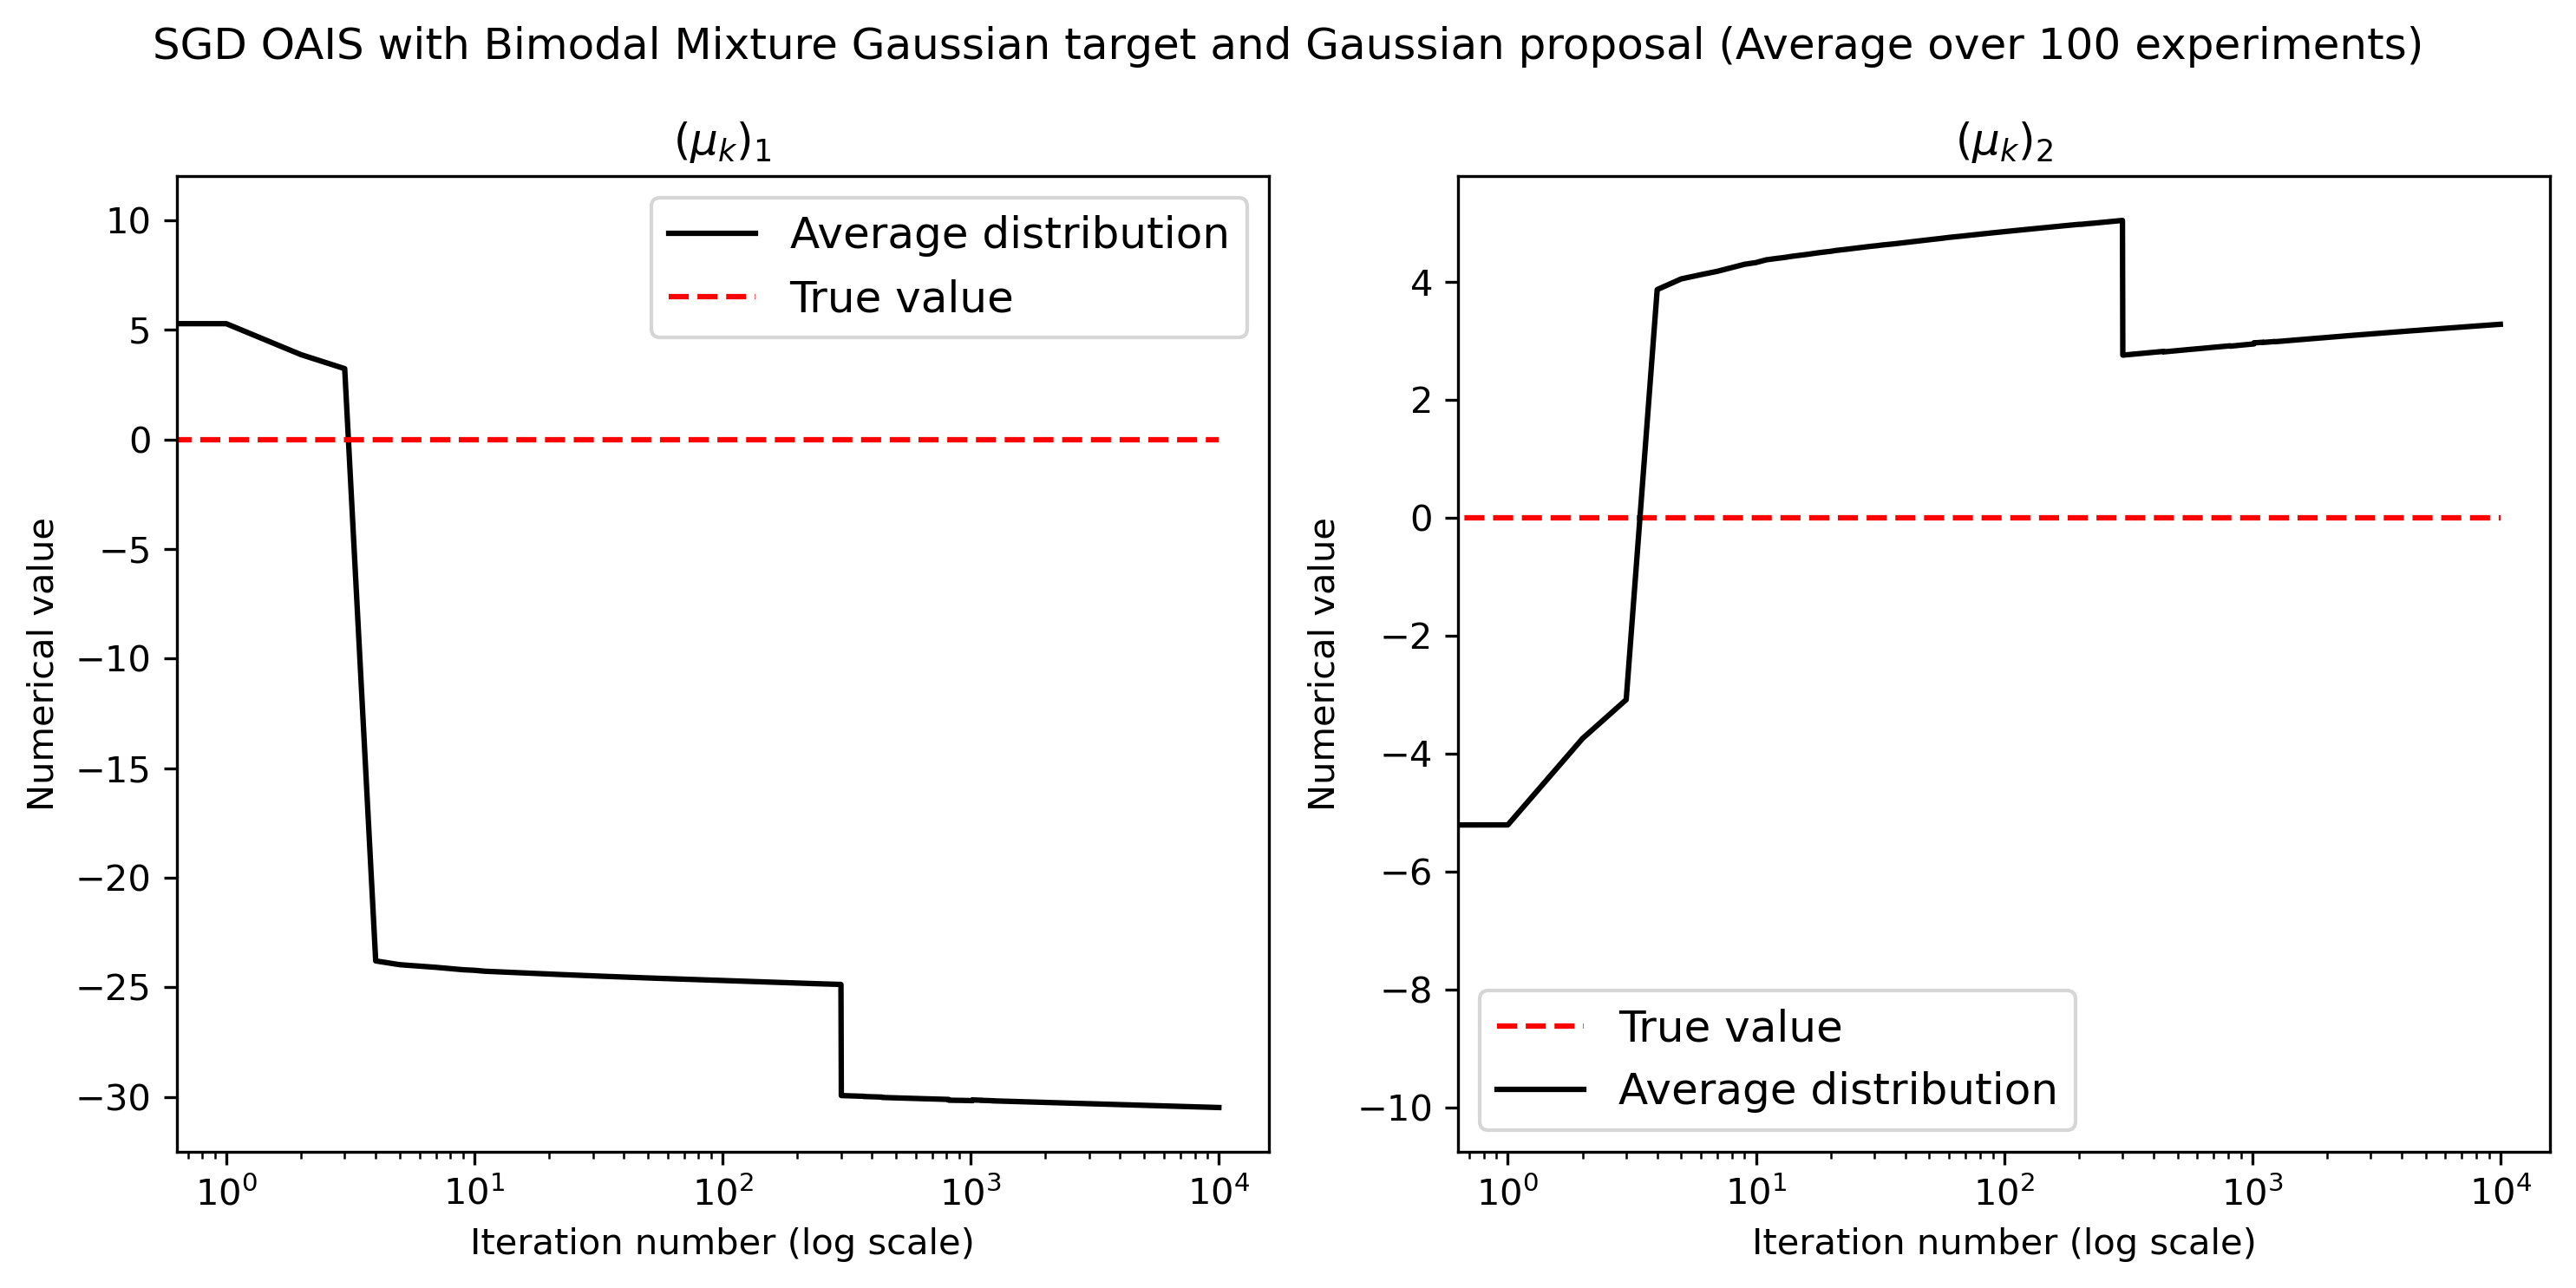

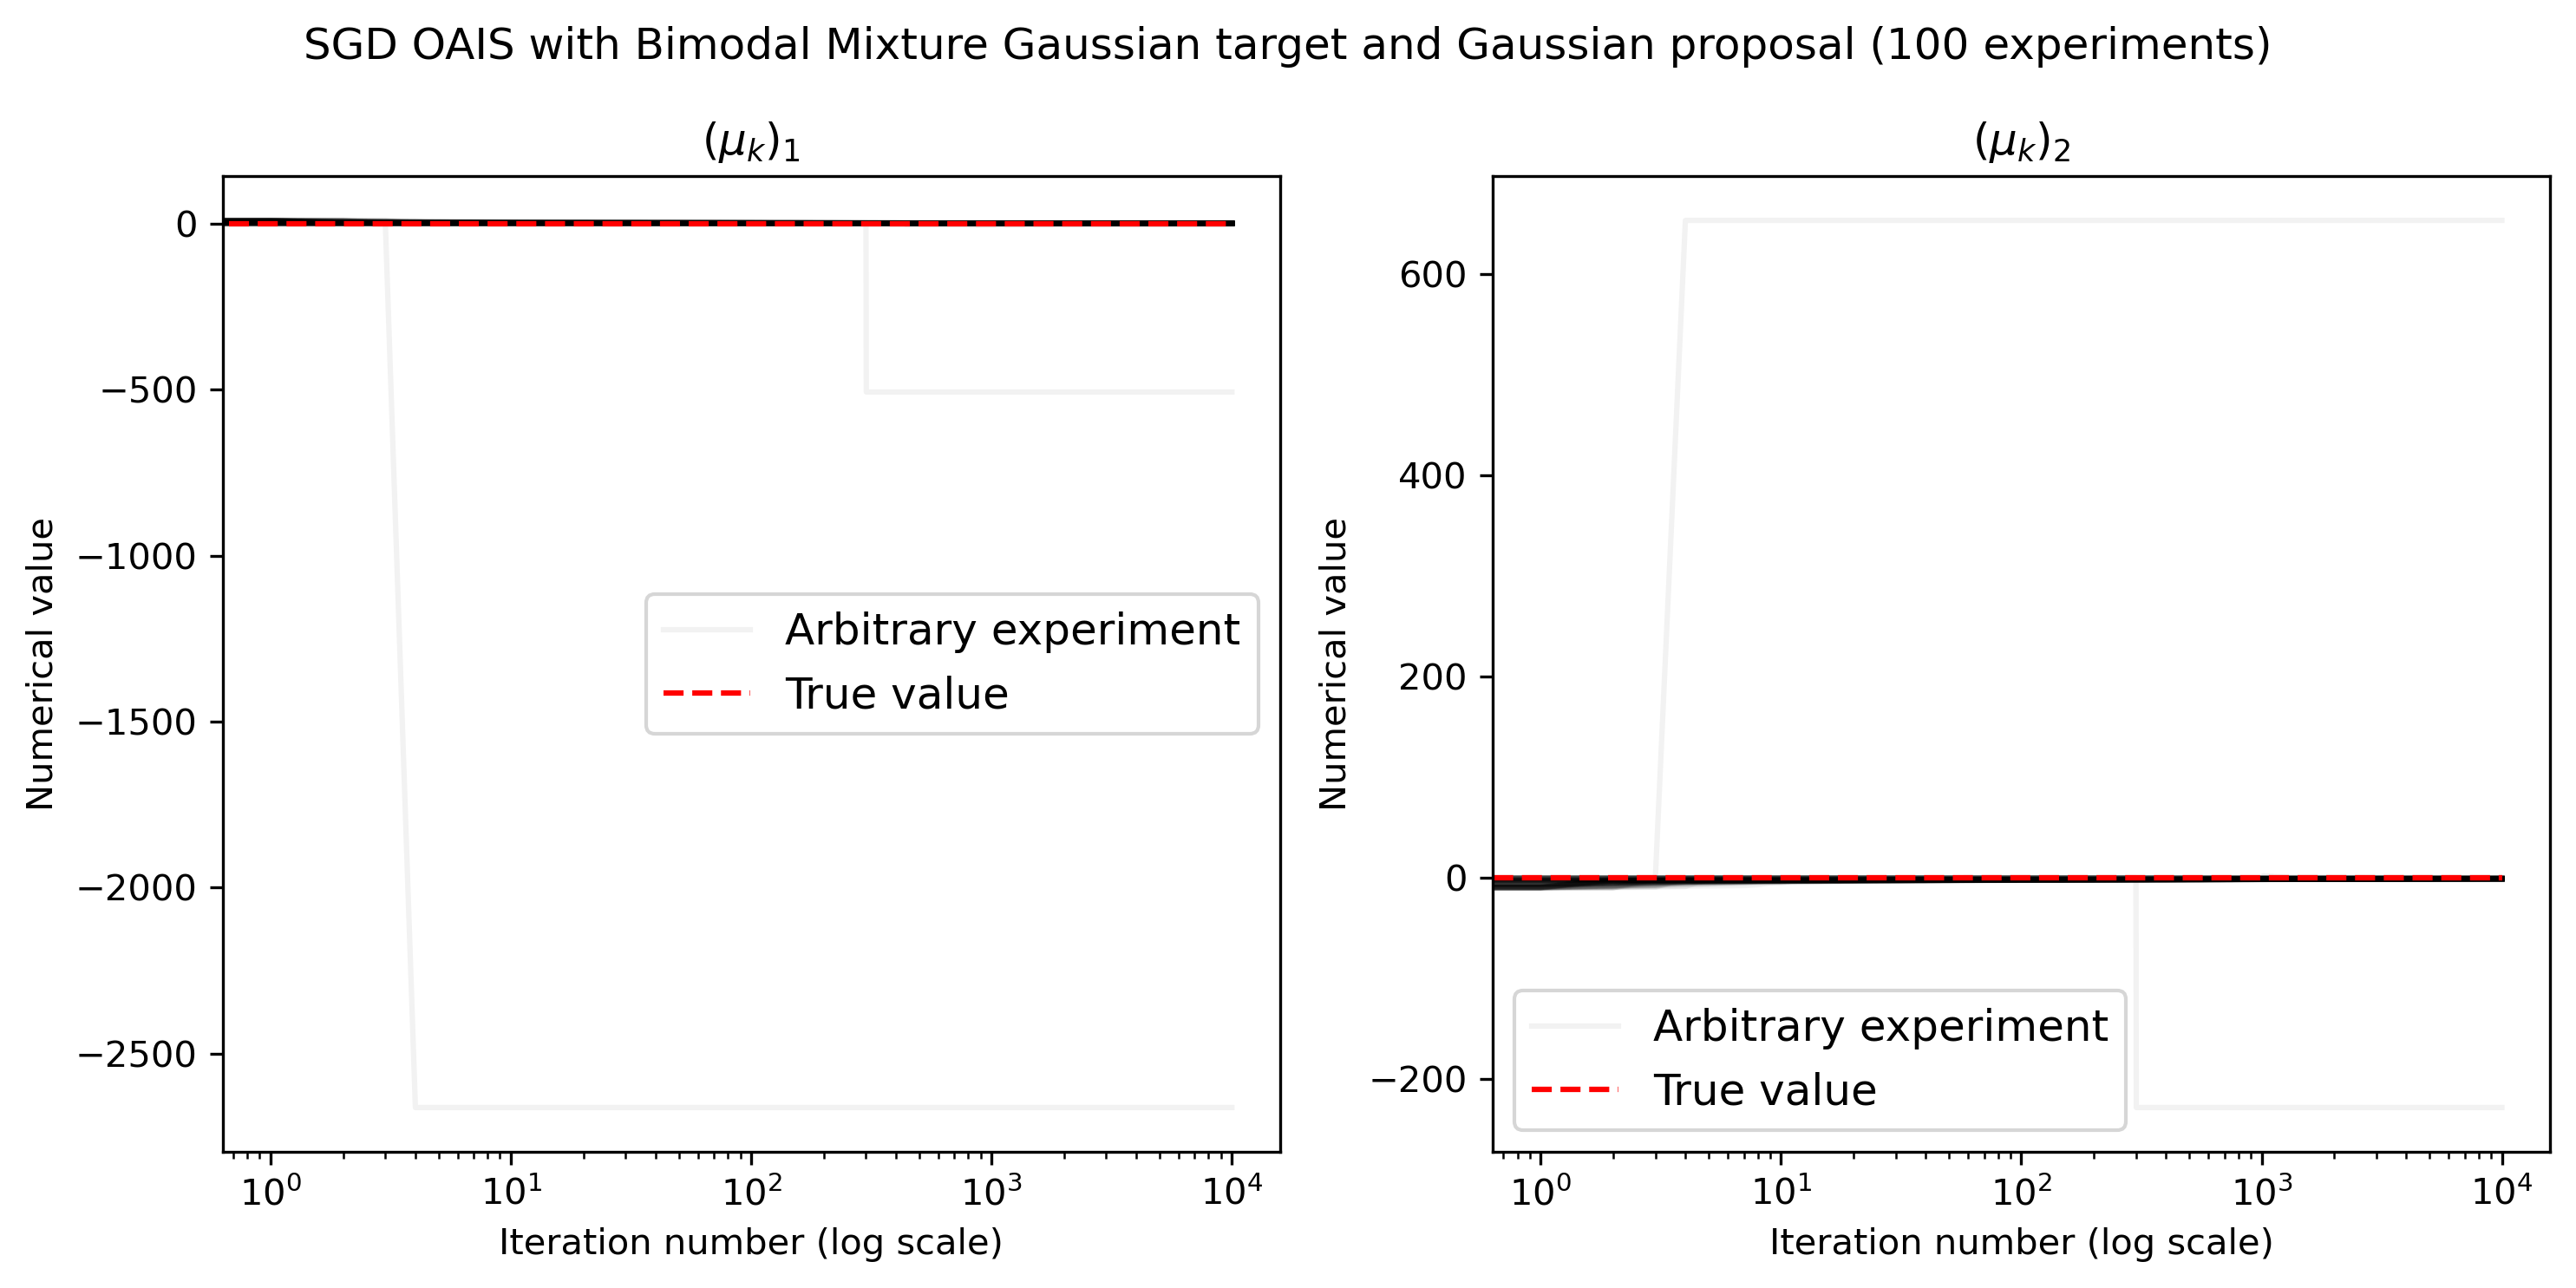

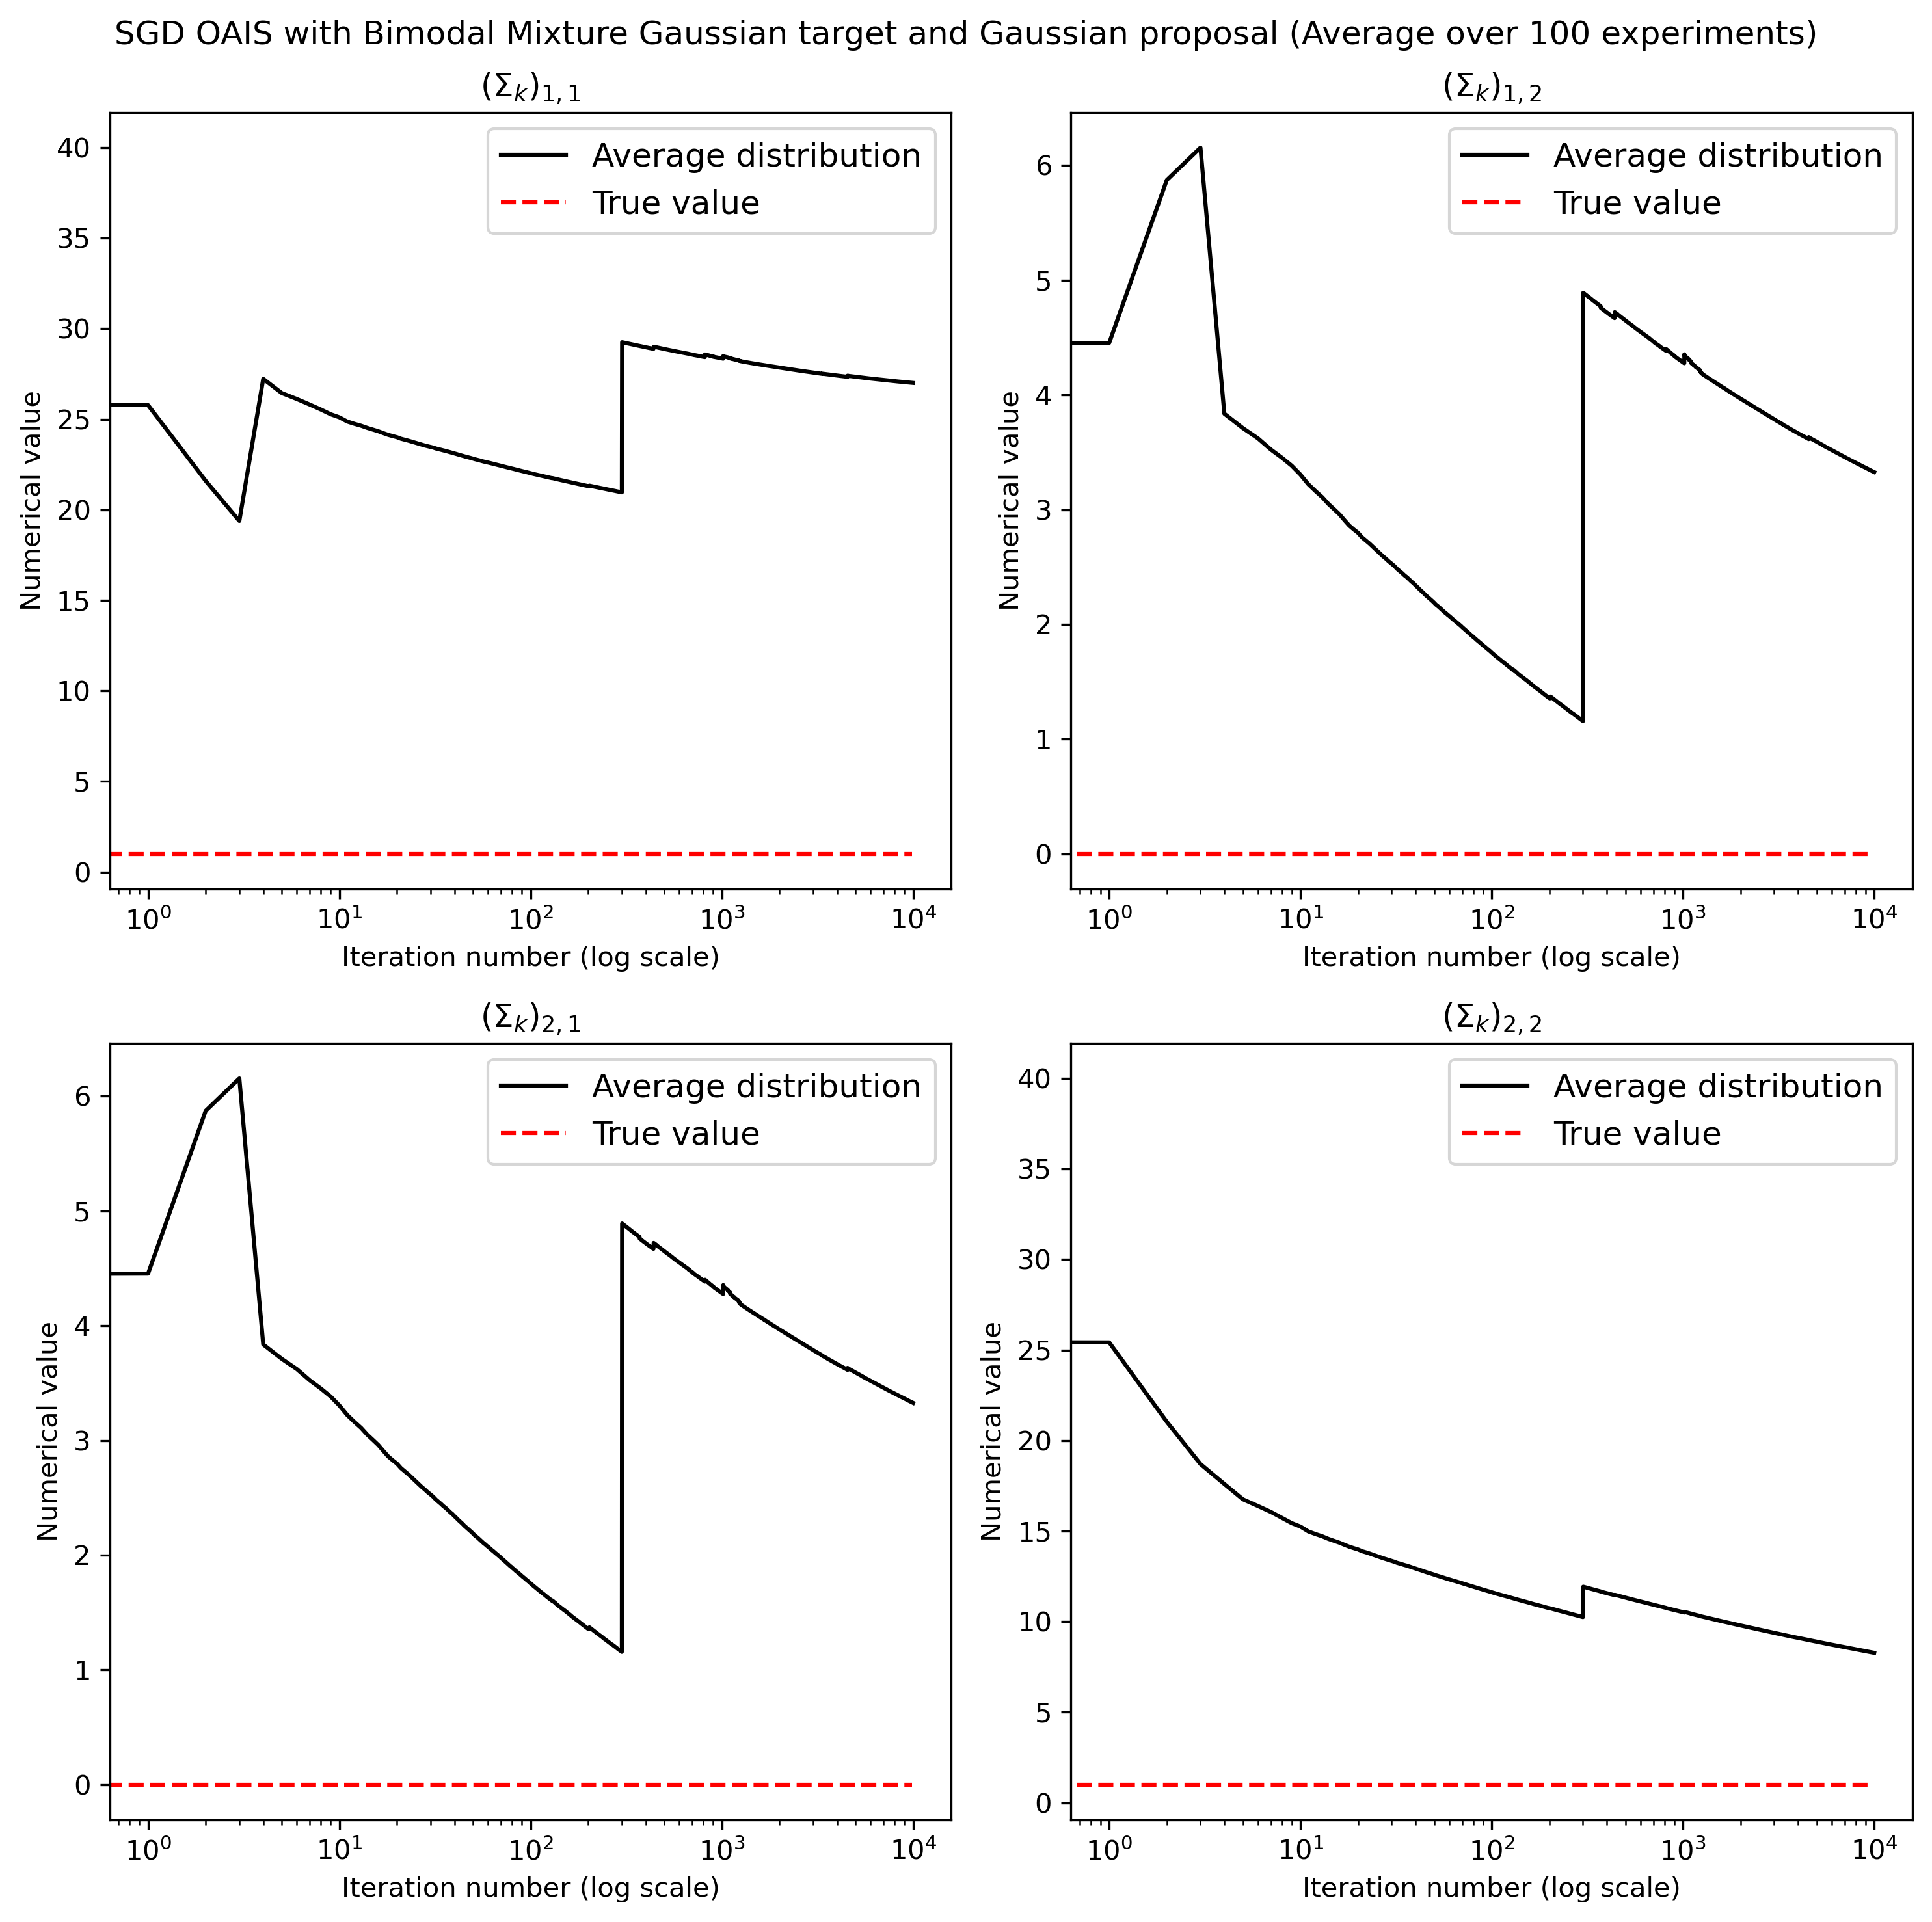

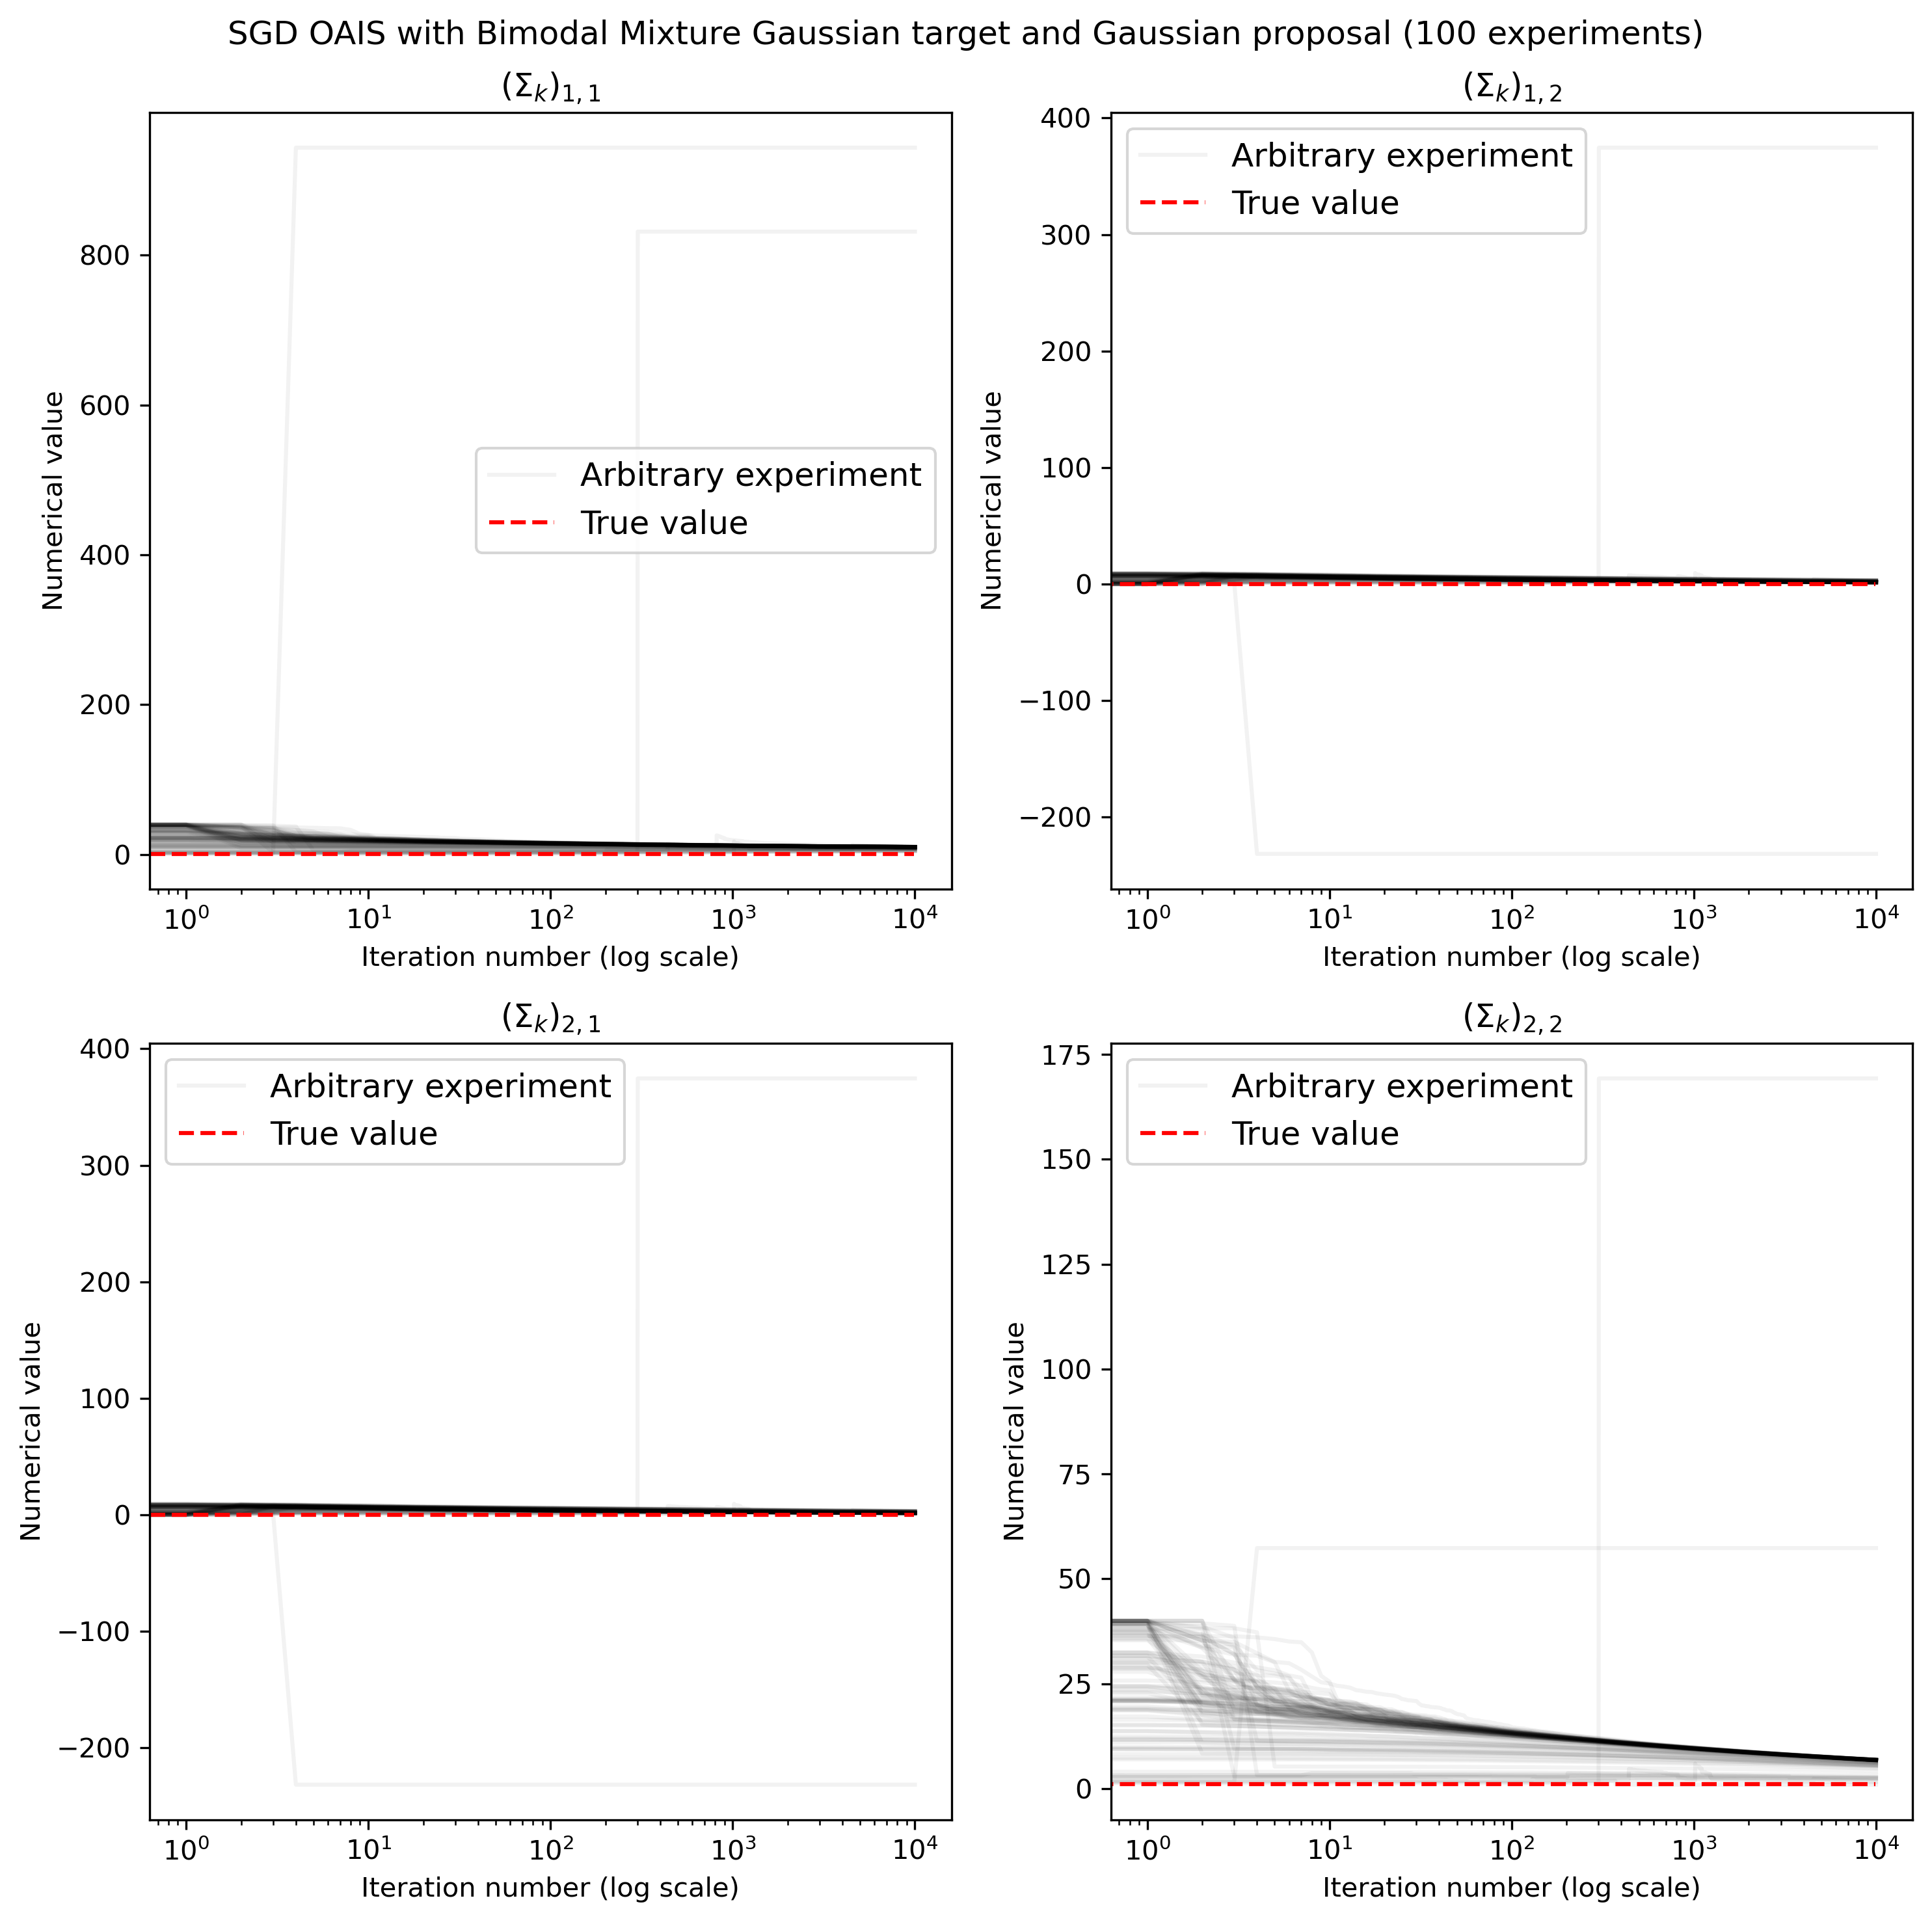

In [30]:
optimiser = "SGD"
for kind in ["mean", "cov"]:
    for average in [True, False]:
        if average:
            title = f"{optimiser} OAIS with Bimodal Mixture Gaussian target and Gaussian proposal (Average over {nexperiments} experiments)"
        else:
            title = f"{optimiser} OAIS with Bimodal Mixture Gaussian target and Gaussian proposal ({nexperiments} experiments)"
        plotter(distribution_array_SG, pi, title=title, kind=kind, average=average, mix=True, alpha=0.05)
        plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/mixture/{optimiser}/{optimiser}_{kind}_avg_{average}.png")


In [58]:
len(results_array_SG[0])

10000

In [54]:
# remove outlier experiments
distribution_array_SG = np.array(distribution_array_SG)
results_array_SG = np.array(results_array_SG)
distribution_array_SG_cleaned = distribution_array_SG[results_array_SG < 1e-3]
results_array_SG_cleaned = results_array_SG[results_array_SG < 1e-3]

IndexError: boolean index did not match indexed array along dimension 1; dimension is 10001 but corresponding boolean dimension is 10000

In [52]:
plot_contours(distribution_array_SG_cleaned, pi, title=f"Evolution of {optimiser} OAIS distribution (average over {nexperiments} experiments)", mix=True)
plt.savefig(f"/Users/carlosperello/Desktop/M3R/figs/mixture/{optimiser}/{optimiser}_contours.png")

NameError: name 'distribution_array_SG_cleaned' is not defined

In [32]:
GT = 0.015574

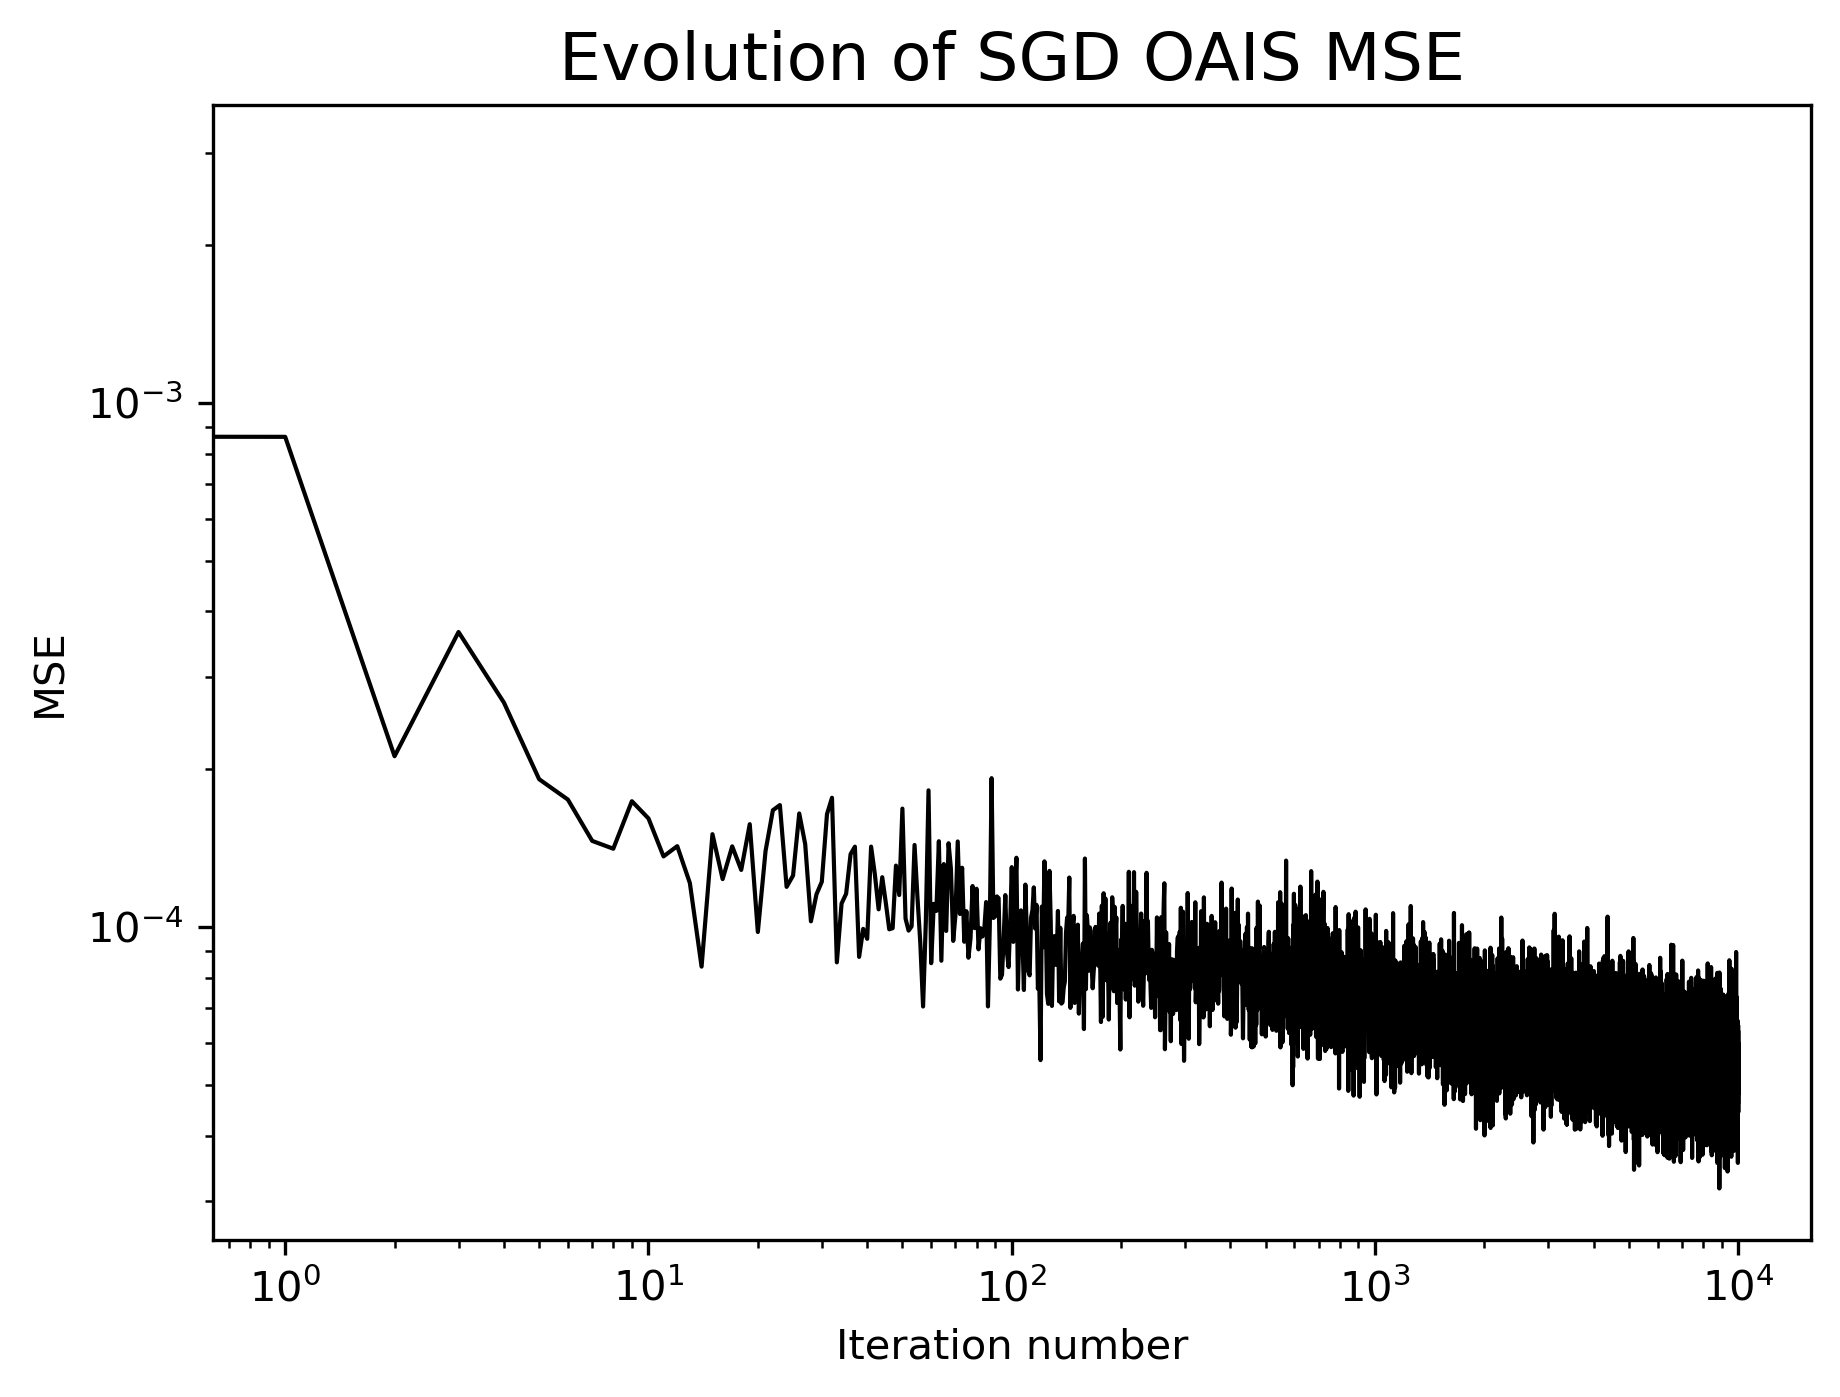

In [50]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plot_mse
plot_mse(results_array_SG, GT, title=f"Evolution of {optimiser} OAIS MSE (average over {nexperiments} experiments)")
plt.title(f"Evolution of {optimiser} OAIS MSE", fontsize=16)
plt.xscale("log")
plt.yscale("log")